In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
start = '2018-01-01'
end = '2019-01-01'

In [3]:
asset = get_pricing('TSLA', fields = 'price', start_date= start,end_date = end)

In [4]:
benchm = get_pricing('SPY', fields = 'price', start_date= start,end_date = end)

In [5]:
asset_returns = asset.pct_change(1)[1:]
benchm_returns = benchm.pct_change(1)[1:]

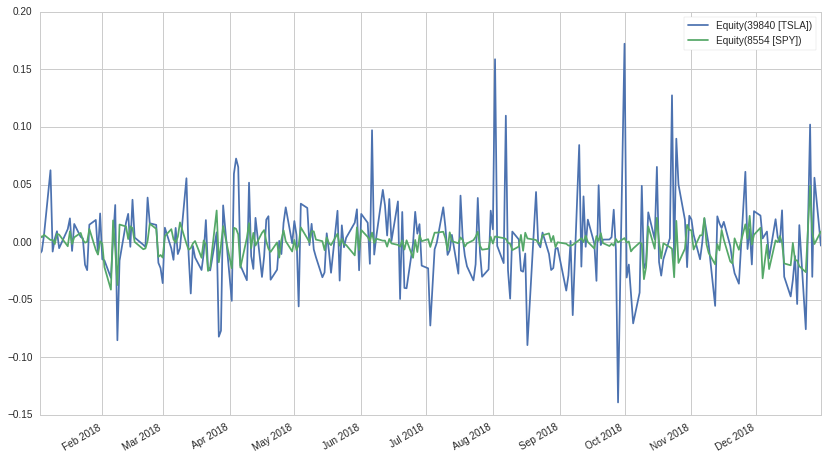

In [6]:
asset_returns.plot()
benchm_returns.plot()
plt.legend()

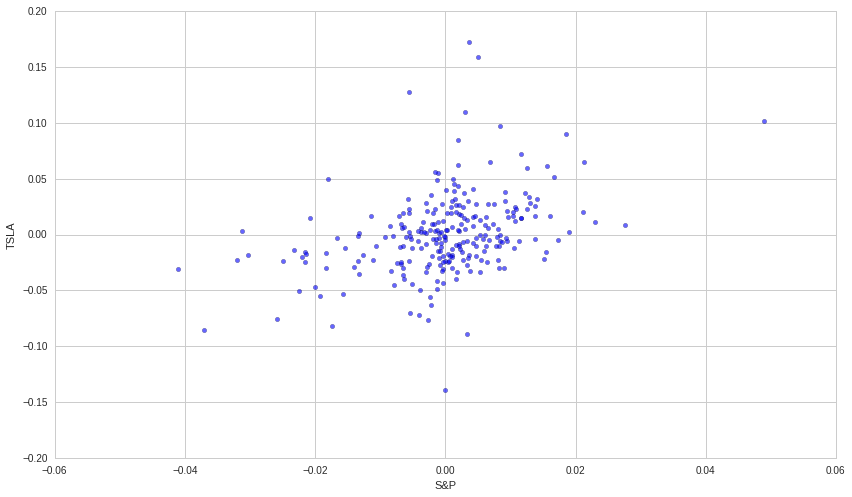

In [7]:
plt.scatter(benchm_returns,asset_returns,alpha = 0.6)
plt.xlabel('S&P')

plt.ylabel('TSLA')

In [8]:
TSLA = asset_returns.values
spy = benchm_returns.values

In [9]:
spy_const = sm.add_constant(spy)

In [10]:
model = regression.linear_model.OLS(TSLA,spy_const).fit()

In [11]:
alpha,beta = model.params

In [12]:
alpha

0.001027774898143564

In [13]:
beta

1.3516236338875101

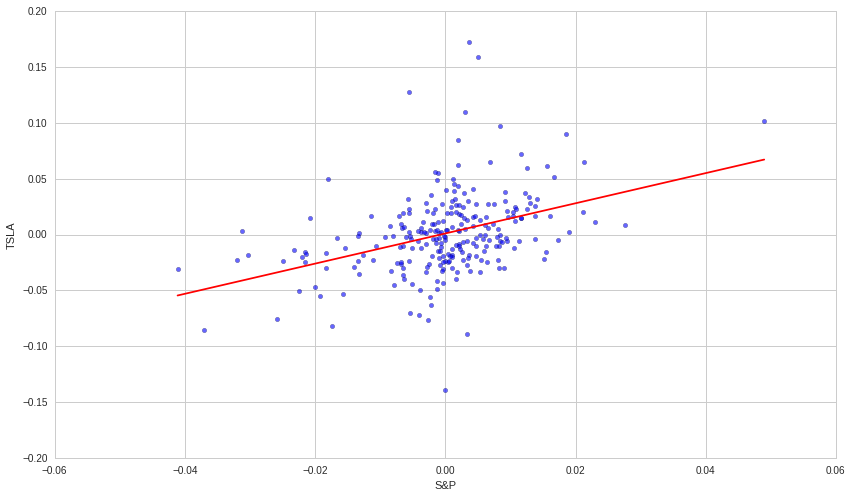

In [14]:
min_spy = benchm_returns.values.min()
max_spy = benchm_returns.values.max()

spy_line = np.linspace(min_spy,max_spy,100)
y = spy_line * beta +alpha

plt.plot(spy_line,y,'r')
plt.scatter(benchm_returns,asset_returns,alpha = 0.6)
plt.xlabel('S&P')
plt.ylabel('TSLA')

In [15]:
hedge = -1 * (beta*benchm_returns+asset_returns)

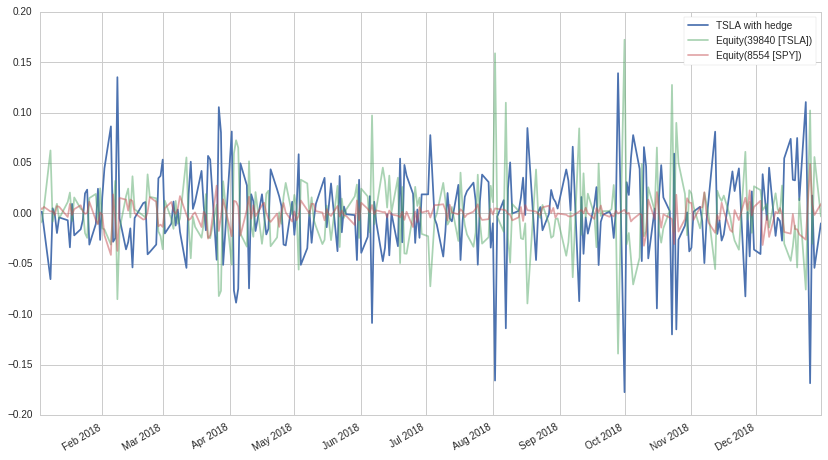

In [16]:
hedge.plot(label = 'TSLA with hedge')
asset_returns.plot(alpha = 0.5)
benchm_returns.plot(alpha = 0.5)
plt.legend()

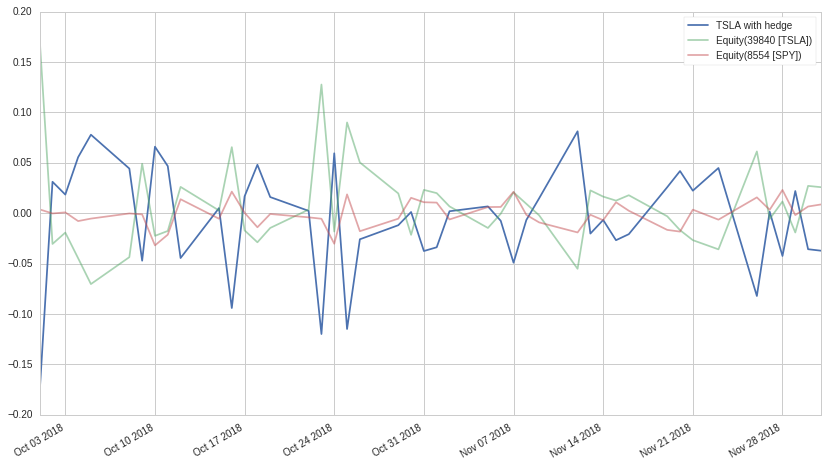

In [17]:
hedge.plot(label = 'TSLA with hedge')
asset_returns.plot(alpha = 0.5)
benchm_returns.plot(alpha = 0.5)
plt.xlim('2018-10-01', '2018-12-01')
plt.legend()

In [18]:
def alpha_beta(benchm_returns,stock):
    benchm = sm.add_constant(benchm_returns)
    model = regression.linear_model.OLS(stock,benchm).fit()
    
    return model.params[0],model.params[1]

In [19]:
start = '2018-01-01'
end = '2019-01-01'
asset2018 = get_pricing('TSLA', fields = 'price', start_date= start,end_date = end)
benchm2018 = get_pricing('SPY', fields = 'price', start_date= start,end_date = end)

asset_ret_2018 = asset2018.pct_change(1)[1:]
benchm_returns_2018 = benchm2018.pct_change(1)[1:]

asset_values = asset_ret_2018.values
benchm_values =  benchm_returns_2018.values

alpha2018,beta2018= alpha_beta(benchm_values,asset_values)

print('alpha ' +str(alpha2018))
print('beta ' + str(beta2018))


alpha 0.00102777489814
beta 1.35162363389


In [20]:
portfolio = -1*beta2018*benchm_returns_2018+ asset_ret_2018

In [21]:
alpha,beta = alpha_beta(benchm_returns_2018,portfolio)

In [22]:
print('alpha '+ str(alpha))
print('beta ' + str(beta))

alpha 0.00102777489814
beta -2.60208521397e-16


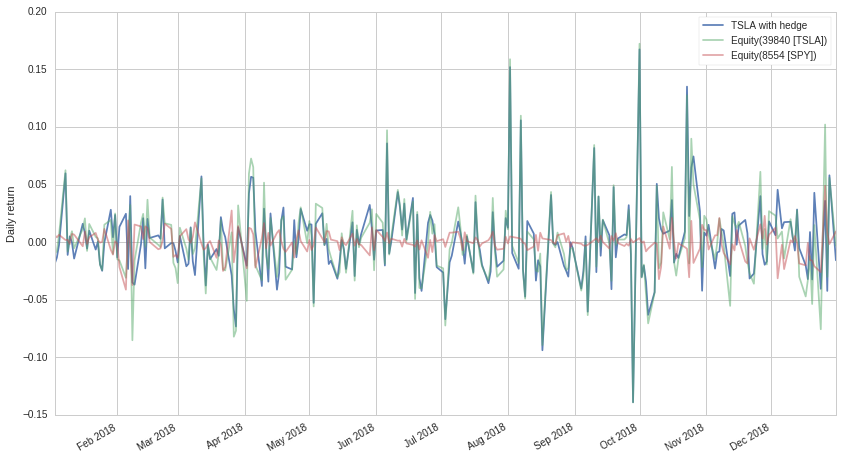

In [23]:
portfolio.plot(alpha = 0.9, label = 'TSLA with hedge')
asset_ret_2018.plot(alpha = 0.5)
benchm_returns_2018.plot(alpha = 0.5)
plt.ylabel('Daily return')
plt.legend()

In [24]:
portfolio.mean()

0.0010277748981435647

In [25]:
asset_ret_2018.mean()

0.0008175241463732408

In [26]:
portfolio.std()

0.033833504561700305

In [27]:
asset_ret_2018.std()

0.03679453570717641

In [32]:
start = '2019-01-01'
end = '2019-10-01'

In [33]:
asset2019 = get_pricing('TSLA', fields = 'price', start_date= start,end_date = end)
benchm2019 = get_pricing('SPY', fields = 'price', start_date= start,end_date = end)

asset_ret_2019 = asset2019.pct_change(1)[1:]
benchm_returns_2019 = benchm2019.pct_change(1)[1:]

asset_values = asset_ret_2019.values
benchm_values =  benchm_returns_2019.values

alpha2019,beta2019= alpha_beta(benchm_values,asset_values)

print('alpha ' +str(alpha2019))
print('beta ' + str(beta2019))


alpha -0.00216740221684
beta 1.4442312674


In [30]:
alpha2018 

-0.0021674022168394974

In [31]:
beta2018

1.4442312673967064

In [34]:
portfolio = -1*beta2018*benchm_returns_2019+ beta2019

In [35]:
alpha,beta = alpha_beta(benchm_returns_2019,portfolio)

In [36]:
alpha

1.4442312673967059

In [37]:
beta

-1.4442312673966802

In [38]:
portfolio.mean()

1.4428558212657212

In [39]:
asset_ret_2019.mean()

-0.000791956085854295

In [40]:
portfolio.std()

0.012235433734424013

In [41]:
asset_ret_2019.std()

0.03028019492380842